In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import preprocessing

In [112]:
train_data = pd.DataFrame(pd.read_csv("train.csv"))
test_data = pd.DataFrame(pd.read_csv("test.csv"))
train_label = train_data['SalePrice']

In [113]:
set(train_data.columns)-set(test_data.columns)

{'SalePrice'}

In [114]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [115]:
for i in train_data.duplicated():
    if i:
        print(i)

In [116]:
train_data_id = train_data.Id
train_data.drop("Id", axis=1, inplace=True)

In [117]:
train_data = train_data[train_data.GrLivArea < 4000]
train_label = train_data['SalePrice']
print(len(train_data))
print(len(train_label))

1456
1456


In [118]:
train_data = train_data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45",  50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75",  80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120",  150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}, 
"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

train_data = train_data.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                                 "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                 "LotShape" : {"IR3" : 0, "IR2" : 1, "IR1" : 2, "Reg" : 3}})

train_data["SimplOverallQual"] = train_data.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                                 4 : 2, 5 : 2, 6 : 2, # average
                                                                 7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                                })

In [119]:
corr = train_data.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)

In [120]:
li2 = list(corr[corr.SalePrice>0.5].index)
li2.remove('SalePrice')

In [121]:
categorical_features = train_data.select_dtypes(include = ["object"]).columns
numerical_features = train_data.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

In [122]:
train_num = train_data[numerical_features].fillna(train_data[numerical_features].median())
train_num = train_num[li2]
train_num = pd.DataFrame(preprocessing.scale(train_num, axis=0))

train_data[categorical_features] = train_data[categorical_features].fillna('None')

In [123]:
li = list(train_data[categorical_features].columns)

In [124]:
#train_num.as_matrix
#train_num

In [125]:
train_cat = [pd.get_dummies(train_data[categorical_features])]
train_cat2 = train_cat[0]

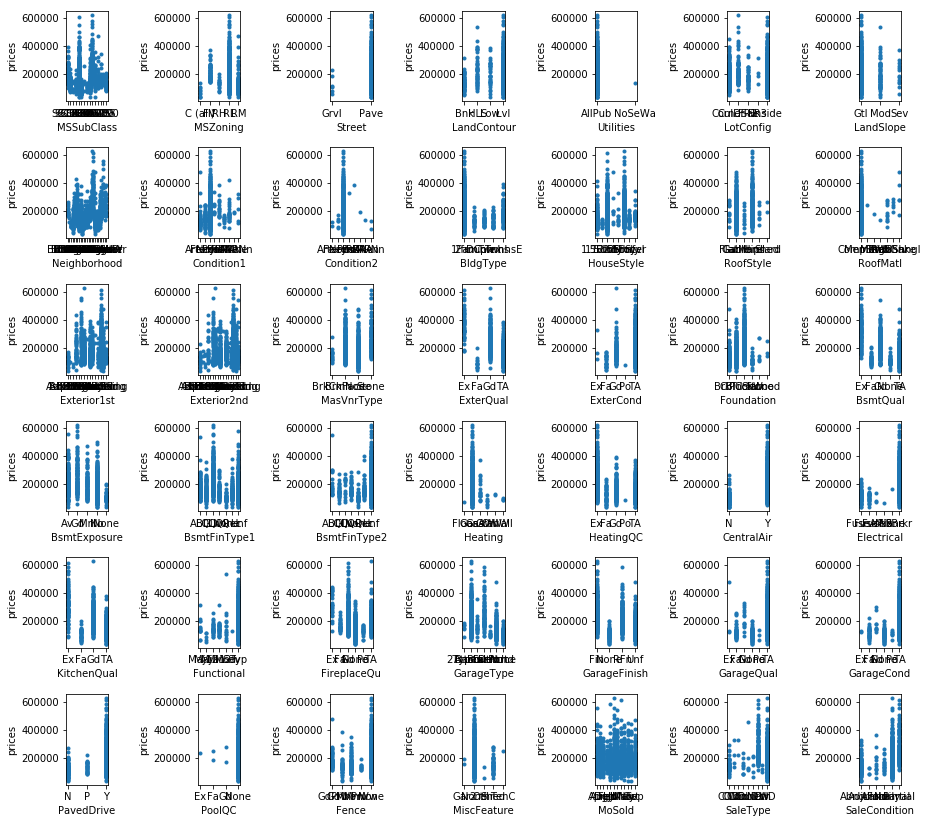

In [149]:
plt.figure(figsize = (13,13))
cont = 1
for i in li:
    plt.subplot(7, 7, cont)
    plt.xlabel(i)
    plt.ylabel('prices')
    plt.tight_layout()
    plt.plot(train_data[i], train_label,'.')
    cont += 1
plt.show()

In [126]:
train_cat2 = train_cat2.reset_index(drop=True)

In [127]:
train = pd.concat([train_num, train_cat2], axis = 1)

In [128]:
for i in test_train_dif:
    train[i] = 0

In [129]:
X_train, X_test, y_train, y_test = train_test_split(train, train_label, test_size = 0.3, random_state = 0)

In [130]:
# stdSc = StandardScaler()    
# X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
# X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])

## Training

In [131]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [132]:
y_train_pred

array([ 173688.,  133640.,  157048., ...,   91408.,  167200.,  237368.])

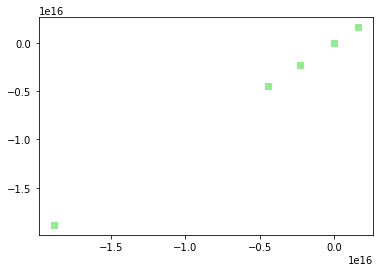

In [147]:
#plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data") # scatter 是散点图
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")

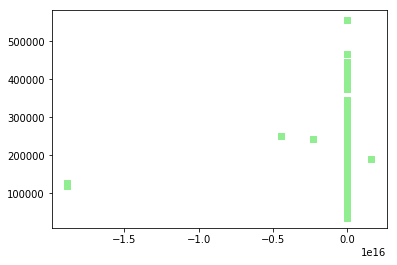

In [148]:
#plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")

In [133]:
test_data = pd.DataFrame(pd.read_csv("test.csv"))

In [134]:
test_data_id = test_data.Id
test_data.drop("Id", axis=1, inplace=True)

In [135]:
test_data = test_data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45",  50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75",  80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120",  150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}, 
"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

test_data = test_data.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                                 "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                 "LotShape" : {"IR3" : 0, "IR2" : 1, "IR1" : 2, "Reg" : 3}})

test_data["SimplOverallQual"] = test_data.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                                 4 : 2, 5 : 2, 6 : 2, # average
                                                                 7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                                })

In [136]:
categorical_features = test_data.select_dtypes(include = ["object"]).columns
numerical_features = test_data.select_dtypes(exclude = ["object"]).columns

In [137]:
test_num = test_data[numerical_features].fillna(test_data[numerical_features].median())
test_num = test_num[li2]
test_num = pd.DataFrame(preprocessing.scale(test_num, axis=0))

test_data[categorical_features] = test_data[categorical_features].fillna('None')

In [138]:
test_cat = [pd.get_dummies(test_data[categorical_features])]

In [139]:
test_cat = test_cat[0]

In [140]:
test = pd.concat([test_num, test_cat], axis = 1)

In [141]:
for i in train_test_dif:
    test[i] = 0

In [142]:
df = pd.DataFrame(lr.predict(test))

In [143]:
df['Id'] = test_data_id

In [145]:
df.columns = ['SalePrice','Id']

pred_y = df[['Id','SalePrice']]

pred_y.to_csv('pred.csv', sep=',',index_label='Id',index=False)

In [102]:
test_train_dif = list(set(test_cat.columns) -set(train_cat2.columns))

train_test_dif = list(set(train.columns)-set(test.columns))

In [24]:
pred_y.to_csv('pred.csv', sep=',',index_label='Id',index=False)

In [ ]:
# pred_y = df[['Id','SalePrice']]
# for i in pred_y['SalePrice']<0:
#     if i:
#         pred_y['SalePrice'][i] = 0
pred_y = df[['Id','SalePrice']]

In [17]:
pred_y = pd.DataFrame(pd.read_csv("pred.csv"))

In [22]:
pred_y['Id'] = test_data_id

In [108]:
test_train_dif 

['MSZoning_None',
 'KitchenQual_None',
 'SaleType_None',
 'Exterior2nd_None',
 'MSSubClass_SC150',
 'Exterior1st_None',
 'Utilities_None',
 'Functional_None']

In [109]:
train_test_dif

['Heating_Floor',
 'RoofMatl_Metal',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Electrical_None',
 'Exterior1st_Stone',
 'RoofMatl_Membran',
 'HouseStyle_2.5Fin',
 'RoofMatl_Roll',
 'Condition2_RRAn',
 'Heating_OthW',
 'Utilities_NoSeWa',
 'PoolQC_Fa',
 'Condition2_RRAe',
 'MiscFeature_TenC',
 'Exterior2nd_Other',
 'GarageQual_Ex']

## RF

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10)

In [152]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [156]:
y_test_pred = rf.predict(X_test)

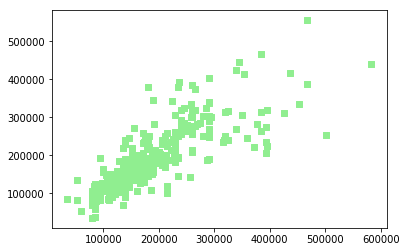

In [157]:
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")

In [158]:
df = pd.DataFrame(rf.predict(test))

In [160]:
df['Id'] = test_data_id

df.columns = ['SalePrice','Id']

pred_y = df[['Id','SalePrice']]

pred_y.to_csv('pred.csv', sep=',',index_label='Id',index=False)

## GBM

In [161]:
from sklearn.ensemble import GradientBoostingClassifier

In [162]:
gbm = GradientBoostingClassifier(n_estimators=100)

In [163]:
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [165]:
y_test_pred = gbm.predict(X_test)

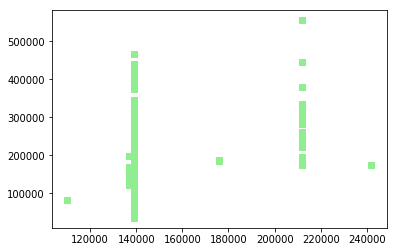

In [166]:
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")

In [169]:
df = pd.DataFrame(gbm.predict(test))

In [170]:
df['Id'] = test_data_id

df.columns = ['SalePrice','Id']

pred_y = df[['Id','SalePrice']]

pred_y.to_csv('pred.csv', sep=',',index_label='Id',index=False)

## XGBoost

In [171]:
from xgboost import XGBClassifier

In [ ]:
eval_set =  [(X_test, y_test)]
model = XGBClassifier()
model.fit(X_train, y_train)